<a href="https://colab.research.google.com/github/VladOS95-cyber/deeplearning_practice/blob/main/RNN_GoogleStockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the training set

In [2]:
traid_dt = pd.read_csv('Google_Stock_Price_Train.csv')
train_set = traid_dt.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_train_set = sc.fit_transform(train_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, len(train_set)):
  X_train.append(scaled_train_set[i-60:i, 0])
  y_train.append(scaled_train_set[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

### Initialising the RNN

In [7]:
rnn = Sequential([
    LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units = 50, return_sequences = True),
    Dropout(0.2),
    LSTM(units = 50, return_sequences = True),
    Dropout(0.2),
    LSTM(units = 50),
    Dropout(0.2),
    Dense(1)
])
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [8]:
rnn.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 22s 108ms/step - loss: 0.0333
Epoch 2/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0064
Epoch 5/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0060
Epoch 6/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0055
Epoch 7/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0051
Epoch 9/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0052
Epoch 10/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0054
Epoch 11/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0041
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [9]:
test_dt = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_dt.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [18]:
dt_total = pd.concat((traid_dt['Open'], test_dt['Open']))
inputs = dt_total[len(dt_total) - len(test_dt) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(test_dt) + 60):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = rnn.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


### Visualising the results

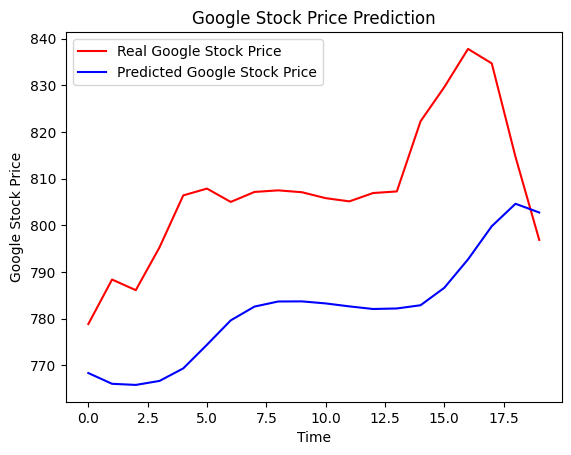

In [21]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()